In [1]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn import preprocessing #引入所需函式庫

combined_chunk = pd.read_csv("./house_with_time_clean.csv")

df = combined_chunk.drop(['交易標的', '主要用途', '總樓層數', '建物型態', '車位類別', '車位總價元', \
                          '車位移轉總面積(平方公尺)', '建築完成年月', 'Unnamed: 0', 'year', \
                            'Month'], axis=1)

/opt/anaconda3/lib/python3.9/site-packages/IPython/core/interactiveshell.py:3444: DtypeWarning: Columns (12,18) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [2]:
df.columns = ['area', 'date', 'price_per_m2', 'ground_trans', 'num_living', 'num_room', 'num_bath',\
                'build_trans', 'city', 'total_price', 'region', 'sum_area', 'balcony_area', 'elevator', 'parking', 'time']

In [3]:
df_covid = pd.read_csv("./COVID-19台灣疫情報表_0513.csv")

In [4]:
df_people = pd.read_csv("./2017_to_present_七都每月年齡與性別人口數量_0513.csv")

In [5]:
filter = df_people['區域別'] == '臺北市'
df_people.loc[filter, '區域別'] = '台北市'
filter2 = df_people['區域別'] == '臺中市'
df_people.loc[filter2, '區域別'] = '台中市'
filter3 = df_people['區域別'] == '臺南市'
df_people.loc[filter3, '區域別'] = '台南市'

In [6]:
for i in range(len(df_people)):
    mask = (df['city'] == df_people.loc[i, '區域別']) & (df['time'] == df_people.loc[i, '日期'])
    sex = df_people.loc[i, '性別']
    if sex == '男':
        df.loc[mask, 'num_male'] = df_people.loc[i, '總計']
        df.loc[mask, 'male_0to4'] = df_people.loc[i, '0~4']
        df.loc[mask, 'male_30to34'] = df_people.loc[i, '30~34']
        df.loc[mask, 'male_35to39'] = df_people.loc[i, '35~39']
        df.loc[mask, 'male_40to44'] = df_people.loc[i, '40~44']
    elif sex == '女':
        df.loc[mask, 'num_female'] = df_people.loc[i, '總計']
        df.loc[mask, 'female_0to4'] = df_people.loc[i, '0~4']
        df.loc[mask, 'female_30to34'] = df_people.loc[i, '30~34']
        df.loc[mask, 'female_35to39'] = df_people.loc[i, '35~39']
        df.loc[mask, 'female_40to44'] = df_people.loc[i, '40~44']

In [7]:
for i in range(len(df_covid)):
    mask = df['date'] == df_covid.loc[i, '日期']
    df.loc[mask, 'total_diagnosed'] = df_covid.loc[i,'總確診數']
    df.loc[mask, 'add_diagnosed'] = df_covid.loc[i,'新增確診數']
    df.loc[mask, 'add_vaccine'] = df_covid.loc[i,'疫苗新增接種劑數']
    df.loc[mask, 'add_test'] = df_covid.loc[i,'新增檢驗件數']
    df.loc[mask, 'add_death'] = df_covid.loc[i,'新增死亡數']
    df.loc[mask, 'CCI'] = df_covid.loc[i,'疫情控管指數']
    df.loc[mask, 'infect_rate'] = df_covid.loc[i,'傳染率']
    df.loc[mask, 'positive_rate'] = df_covid.loc[i,'陽性率']
    

In [8]:
df.shape

(977659, 34)

In [9]:
df.dropna(axis='index', how='any', subset=['price_per_m2', 'total_price'], inplace=True)
# df.dropna(axis='index', how='any', subset=['price_per_m2', 'add_diagnosed'], inplace=True)

In [10]:
df.shape

(977651, 34)

In [12]:
df

,area,date,price_per_m2,ground_trans,num_living,num_room,num_bath,build_trans,city,total_price,...,female_35to39,female_40to44,total_diagnosed,add_diagnosed,add_vaccine,add_test,add_death,CCI,infect_rate,positive_rate
0,92.41,2020-05-14,138000.0,41.27,2,3,2,188.58,台北市,24000000,...,116399.0,118130.0,440.0,0.0,0.0,68660.0,0.0,25.93,0.17,0.000
1,102.33,2020-05-17,129795.0,61.85,2,3,2,138.68,台北市,18000000,...,116399.0,118130.0,440.0,0.0,0.0,69388.0,0.0,25.93,0.13,0.000
2,260.21,2020-05-22,269549.0,52.19,1,5,2,352.44,台北市,95000000,...,116399.0,118130.0,441.0,1.0,0.0,70529.0,0.0,25.93,0.10,0.001
3,143.84,2020-05-17,190205.0,50.61,2,3,2,333.22,台北市,63380000,...,116399.0,118130.0,440.0,0.0,0.0,69388.0,0.0,25.93,0.13,0.000
4,32.86,2020-06-07,160788.0,14.29,1,1,1,57.85,台北市,9300000,...,115993.0,118247.0,443.0,0.0,0.0,73475.0,0.0,25.93,0.12,0.001
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
977654,170.21,2020-05-29,76041.0,76.50,3,4,4,181.48,新竹縣,13800000,...,24667.0,26365.0,442.0,1.0,0.0,71912.0,0.0,25.93,0.09,0.001
977655,186.00,2020-05-14,99476.0,127.66,2,5,4,209.90,新竹縣,20880000,...,24667.0,26365.0,440.0,0.0,0.0,68660.0,0.0,25.93,0.17,0.000
977656,229.88,2020-05-06,66553.0,93.42,2,5,4,269.26,新竹縣,17920000,...,24667.0,26365.0,439.0,1.0,0.0,66043.0,0.0,31.48,0.37,0.003
977657,260.65,2020-05-02,74012.0,84.92,2,6,4,309.68,新竹縣,22920000,...,24667.0,26365.0,432.0,3.0,0.0,64091.0,0.0,31.48,0.44,0.001


In [11]:
df_taipei = df[df['city']=='新北市']

In [68]:
# df_xinchu = df[df['city']=='新竹市']

In [4]:
# df_taoyuan = df[df['city']=='桃園市']

In [13]:
df_citys = df.groupby('city')#記得換
for city, group in df_citys:

    group['price_per_m2'] = group['price_per_m2'] / 1000.0 # 以千為單位
    group['total_price'] = group['total_price'] / 100000.0
    group['num_male'] = group['num_male'] / 1000.0 # 以千為單位
    group['num_female'] = group['num_female'] / 1000.0 # 以千為單位
    
    group['male_0to4'] = group['male_0to4'] / 1000.0
    group['male_30to34'] = group['male_30to34'] / 1000.0
    group['male_35to39'] = group['male_35to39'] / 1000.0
    group['male_40to44'] = group['male_40to44'] / 1000.0
    group['female_0to4'] = group['female_0to4'] / 1000.0
    group['female_30to34'] = group['female_30to34'] / 1000.0
    group['female_35to39'] = group['female_35to39'] / 1000.0
    group['female_40to44'] = group['female_40to44'] / 1000.0

    group_sort = group.sort_values('date', ascending=True)
    group_sort = group_sort.drop(['city'], axis=1)

    group_data = group_sort[(group_sort['date'] >= "2021-01-01") & (group_sort['date'] < "2021-05-01")]
    split_len = len(group_sort[(group_sort['date'] >= "2021-01-01") & \
                                (group_sort['date'] < "2021-04-01")])

    group_data = group_data.sort_values('date', ascending=True)

    #----是否拿掉日期----#
    group_data = group_data.drop(['date', 'price_per_m2'], axis=1)
    #----篩選特定特徵----#
    group_data = group_data[['area','ground_trans','num_bath','build_trans','total_price','region',\
                            'sum_area','balcony_area','elevator','parking']]
    # mask = group_data['price_per_m2'] != 0
    # group_data = group_data[mask]

    #----select categorical features----#

    continuous_index = []
    categorical_index = []
    for index, d in enumerate(group_data.dtypes):
        if (d != "object"):
            continuous_index.append(index)
        else:
            categorical_index.append(index)

    continuous_features = group_data.columns[continuous_index]
    categorical_features = group_data.columns[categorical_index]

    #----label encoding----#
    group_data_le = group_data.copy()
    labelencoder = LabelEncoder()
    #df_train[pd.isnull(df_train)]  = 'NaN'
    for i in categorical_features: #將轉換是object的傢伙轉換，從object_data陣列一個一個抓出來改
        group_data_le[i] = labelencoder.fit_transform(group_data[i])
        # group_data[i] = LabelEncoder().fit_transform(group_data[i].factorize()[0])
        #pd.factorize()[0]會給nans(缺失值)一個-1的值，若沒寫這個，會造成等號兩邊不等的情況
    
    #----heap map----#
    # group_corr = group_data_le.corr()
    # print(group_corr.shape)

    categorical_data = group_data_le[categorical_features]
    continuous_data = group_data_le[continuous_features]

    # target_data = continuous_data['price_per_m2']
    # continuous_data = continuous_data.drop(['price_per_m2'], axis=1)
    target_data = continuous_data['total_price']
    continuous_data = continuous_data.drop(['total_price'], axis=1)
    
    #----one hot encoding----#

    onehotencoder = OneHotEncoder()
    categorical_data = onehotencoder.fit_transform(categorical_data).toarray()

    onehot_data = np.concatenate([categorical_data, continuous_data.to_numpy()], axis=1)
    onehot_data = pd.DataFrame(onehot_data)

    x_train = onehot_data[:split_len]
    x_test = onehot_data[split_len:]
    y_train = target_data[:split_len]
    y_test = target_data[split_len:]
    
    x_train.to_csv('./data/train/x_train_%s.csv' % (city), index=False)
    y_train.to_csv('./data/train/y_train_%s.csv' % (city), index=False)
    x_test.to_csv('./data/test/x_test_%s.csv' % (city), index=False)
    y_test.to_csv('./data/test/y_test_%s.csv' % (city), index=False)

In [61]:
onehot_data

,0,1,2,3,4,5,6,7,8,9,...,36,37,38,39,40,41,42,43,44,45
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,1.0,0.0,60.74,9.38,2.0,122.59,2.98,9.26
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,1.0,74.58,48.00,2.0,74.58,0.00,0.00
2,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,1.0,0.0,75.16,23.27,2.0,158.09,0.00,8.94
3,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,1.0,0.0,65.84,13.12,2.0,115.29,7.66,0.00
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,1.0,118.23,30.56,2.0,171.93,0.63,13.18
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10747,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,1.0,134.28,58.00,3.0,138.16,3.88,0.00
10748,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,1.0,0.0,69.43,24.72,2.0,149.04,7.88,0.00
10749,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,1.0,193.13,85.28,4.0,225.79,12.43,0.00
10750,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,1.0,64.52,19.05,1.0,113.11,18.31,0.00


In [71]:
group_data['region'].unique()

array(['新竹市'], dtype=object)

In [45]:
le_date = labelencoder.fit_transform(group_data['date'])

In [46]:
onehot_back_date = labelencoder.inverse_transform(le_date)

In [47]:
onehot_back_date

array(['2021-01-01', '2021-01-01', '2021-01-01', ..., '2021-04-30',
       '2021-04-30', '2021-04-30'], dtype=object)

<AxesSubplot:>

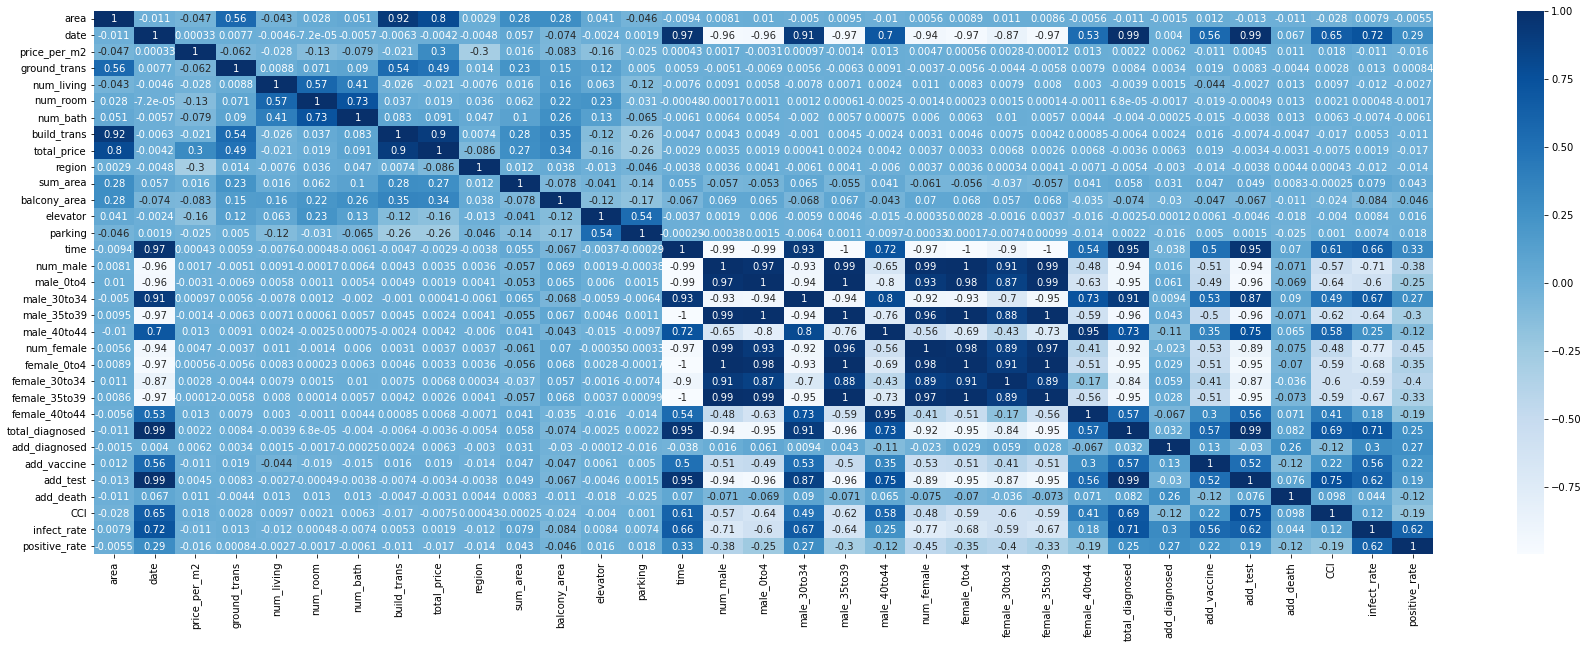

In [15]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.subplots(figsize=(30, 10))
sns.heatmap(group_corr, annot=True, vmax=1, cmap='Blues')